In [134]:
import numpy as np
import matplotlib.pyplot as plt

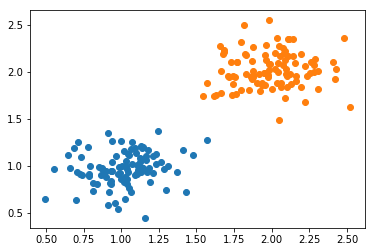

In [154]:
mean_1 = np.array([1,1])
mean_2 = np.array([2,2])
std = 0.2

N = 100

a_1 = np.random.normal(1, std, N)
a_2 = np.random.normal(1, std, N)
a = np.vstack((a_1, a_2, np.zeros(N)))

b_1 = np.random.normal(2, std, N)
b_2 = np.random.normal(2, std, N)
b = np.vstack((b_1, b_2, np.ones(N)))

data = np.vstack((a.T, b.T))
X = np.array(data[:,:2])
Y = np.array(data[:,2])

plt.plot(a[0], a[1], 'o')
plt.plot(b[0], b[1], 'o')

In [155]:
def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis = 0)
    x = x - mean_x
    std_x = np.std(x, axis = 0)
    x = x / std_x
    return x, mean_x, std_x

In [156]:
X, mean_X, std_X = standardize(X)
X = np.column_stack((np.ones(X.shape[0]), X))

In [157]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_gradient(z):
    return (1 - sigmoid(z)) * sigmoid(z)

In [158]:
def logistic_loss(y, x, w):
    return - np.mean(y * np.log(sigmoid(x @ w.T)) + (np.ones(y.shape[0])-y) * np.log(sigmoid(1 - x @ w.T)))

def logistic_gradient(y, x, w):
    return (1 / y.shape[0]) * x.T @ (pred(x, w) - y)

def pred(x, w):
    return sigmoid(x @ w.T)

In [159]:
def gradient_descent(y, tx, init_w, max_iter, gamma, batch_size = 1):
    w = init_w
    rand_list = np.arange(y.shape[0])
    for i in range(max_iter):
        if batch_size != 1:
            np.random.shuffle(rand_list)
            # randomizing y and tx so we can take the first *batch_size* elements
            y = y[rand_list]
            tx = tx[rand_list]
            
        grad = logistic_gradient(y, tx, w)
        w = w - gamma * grad
        
        loss = logistic_loss(y, tx, w)
    return loss, w

In [160]:
loss, w = gradient_descent(Y, X, np.array([10,2,2]), 200, 0.5)
w

array([4.06922577, 5.78477558, 6.38653263])

In [161]:
def classification(x):
    return np.where(x < 1/2, 0, 1)

In [162]:
clas = classification(pred(X, w))
wrong = np.where(clas - Y != 0, 'red', 'blue')

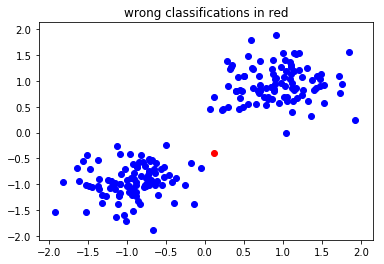

In [163]:
plt.title('wrong classifications in red')
for i in range(X.shape[0]):
    plt.scatter(X[i,1], X[i,2], color = wrong[i])

In [164]:
## error precentage on train data
np.sum(np.abs(clas-Y))/Y.shape[0] * 100

0.5